# Recurrent Neural Network

### Part 1 - Data Preprocessing

In [11]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Importing the training set
dataset_train = pd.read_csv('Google_Stock_Price_Train.csv')
training_set = dataset_train.iloc[:, 1:2].values

# Feature Scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

# Creating a data structure with 60 timesteps and 1 output
X_train = []
y_train = []
for i in range(60, 1258):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

# Reshaping
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

### Part 2 - Building the RNN

In [12]:
# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM, GRU
from keras.layers import Dropout
from keras.optimizers import SGD

# Initialising the RNN
regressor = Sequential()

# Adding the first GRU layer and some Dropout regularisation
regressor.add(GRU(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

# Adding a second GRU layer and some Dropout regularisation
regressor.add(GRU(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a third GRU layer and some Dropout regularisation
regressor.add(GRU(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a fourth GRU layer and some Dropout regularisation
regressor.add(GRU(units = 50))
regressor.add(Dropout(0.2))

# Adding the output layer
regressor.add(Dense(units = 1))

# Compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)



Epoch 1/100
1198/1198 [==============================] - 12s 10ms/step - loss: 0.0499
Epoch 2/100
1198/1198 [==============================] - 7s 6ms/step - loss: 0.0067
Epoch 3/100
1198/1198 [==============================] - 7s 6ms/step - loss: 0.0057
Epoch 4/100
1198/1198 [==============================] - 7s 6ms/step - loss: 0.0049
Epoch 5/100
1198/1198 [==============================] - 7s 6ms/step - loss: 0.0048
Epoch 6/100
1198/1198 [==============================] - 7s 6ms/step - loss: 0.0042
Epoch 7/100
1198/1198 [==============================] - 7s 6ms/step - loss: 0.0041
Epoch 8/100
1198/1198 [==============================] - 7s 6ms/step - loss: 0.0039
Epoch 9/100
1198/1198 [==============================] - 7s 6ms/step - loss: 0.0043
Epoch 10/100
1198/1198 [==============================] - 7s 6ms/step - loss: 0.0036
Epoch 11/100
1198/1198 [==============================] - 7s 6ms/step - loss: 0.0032
Epoch 12/100
1198/1198 [==============================] - 7s 6ms/step - 

1198/1198 [==============================] - 8s 7ms/step - loss: 0.0014A: 2s - 
Epoch 98/100
1198/1198 [==============================] - 8s 6ms/step - loss: 0.0014
Epoch 99/100
1198/1198 [==============================] - 8s 6ms/step - loss: 0.0012
Epoch 100/100
1198/1198 [==============================] - 8s 6ms/step - loss: 0.0014


### Part 3 - Making the predictions and visualising the results

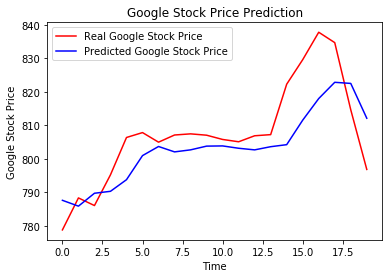

In [13]:
# Getting the real stock price of 2017
dataset_test = pd.read_csv('Google_Stock_Price_Test.csv')
real_stock_price = dataset_test.iloc[:, 1:2].values

# Getting the predicted stock price of 2017
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 80):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

# Visualising the results
plt.plot(real_stock_price, color = 'red', label = 'Real Google Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()

#### Trocando Paramêtros

In [14]:
# The GRU architecture
regressorGRU = Sequential()
# First GRU layer with Dropout regularisation
regressorGRU.add(GRU(units=50, return_sequences=True, input_shape=(X_train.shape[1],1), activation='tanh'))
regressorGRU.add(Dropout(0.2))
# Second GRU layer
regressorGRU.add(GRU(units=50, return_sequences=True, input_shape=(X_train.shape[1],1), activation='tanh'))
regressorGRU.add(Dropout(0.2))
# Third GRU layer
regressorGRU.add(GRU(units=50, return_sequences=True, input_shape=(X_train.shape[1],1), activation='tanh'))
regressorGRU.add(Dropout(0.2))
# Fourth GRU layer
regressorGRU.add(GRU(units=50, activation='tanh'))
regressorGRU.add(Dropout(0.2))
# The output layer
regressorGRU.add(Dense(units=1))
# Compiling the RNN
regressorGRU.compile(optimizer=SGD(lr=0.01, decay=1e-7, momentum=0.9, nesterov=False),loss='mean_squared_error')
# Fitting to the training set
regressorGRU.fit(X_train,y_train,epochs=50,batch_size=150)

Epoch 1/50
1198/1198 [==============================] - 9s 7ms/step - loss: 0.1577
Epoch 2/50
1198/1198 [==============================] - 3s 2ms/step - loss: 0.0929
Epoch 3/50
1198/1198 [==============================] - 4s 3ms/step - loss: 0.0592
Epoch 4/50
1198/1198 [==============================] - 2s 2ms/step - loss: 0.0376
Epoch 5/50
1198/1198 [==============================] - 2s 2ms/step - loss: 0.0199
Epoch 6/50
1198/1198 [==============================] - 2s 2ms/step - loss: 0.0104
Epoch 7/50
1198/1198 [==============================] - 2s 2ms/step - loss: 0.0067
Epoch 8/50
1198/1198 [==============================] - 2s 2ms/step - loss: 0.0055
Epoch 9/50
1198/1198 [==============================] - 2s 2ms/step - loss: 0.0052
Epoch 10/50
1198/1198 [==============================] - 2s 2ms/step - loss: 0.0046
Epoch 11/50
1198/1198 [==============================] - 2s 2ms/step - loss: 0.0042
Epoch 12/50
1198/1198 [==============================] - 2s 2ms/step - loss: 0.0046
E

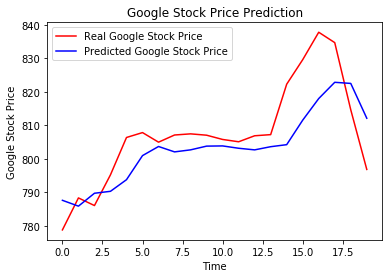

In [15]:
# Getting the real stock price of 2017
dataset_test = pd.read_csv('Google_Stock_Price_Test.csv')
real_stock_price = dataset_test.iloc[:, 1:2].values

# Getting the predicted stock price of 2017
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 80):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

# Visualising the results
plt.plot(real_stock_price, color = 'red', label = 'Real Google Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()